In [1]:
import numpy as np
import pandas as pd

import astropy.units as u
from astropy import coordinates, units as u, wcs
from astropy.io.votable import parse
from astropy.table import Table, Column, QTable
from astropy.io import fits
from astropy.visualization import simple_norm


from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets
import ipyaladin.aladin_widget as ipyal
from ipywidgets import interact, interactive, fixed, interact_manual

from astroquery.gaia import Gaia
from astroquery.vizier import Vizier

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import CCDData
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


from skimage import transform

import importlib 

%matplotlib notebook


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


coords= <SkyCoord (ICRS): (ra, dec) in deg
    (92.04725, 24.33526111)>


<IPython.core.display.Javascript object>


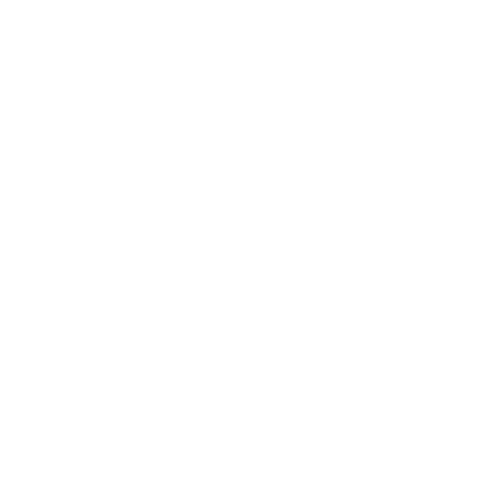

In [2]:
# Get coordinates of the field from our (partially reduced) test image from SAMI
# This is just to get coordinates and show what this field of view looks like with SOAR

raw_ori = "SAMI_raw_92.0421916666667_24.335395.fits"


hdu = fits.open(raw_ori) 
header = hdu[0].header
data = hdu[0].data




coords = SkyCoord(header["RA"],header["DEC"],unit=(u.hourangle,u.degree), frame='icrs')
print("coords=",coords)


fig0 = plt.figure(figsize=(5,5))
gs0 = GridSpec(figure=fig0,ncols=1,nrows=1)
axim1 = fig0.add_subplot(gs0[0])


im1 = axim1.imshow(data,origin='lower',cmap='gray')



In [3]:
# General field of view we are looking for can be shown by aladin


### NOTICE HOW THE IMAGES ARE FLIPPED IN X/RA ###

fov = 4*u.arcmin
aladin = ipyal.Aladin(target=coords.to_string(), fov=fov.to(u.degree).to_value(), survey='DSS')

aladin

Aladin(fov=0.06666666666666667, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'over…

# Gaia query

We have a field of stars on which we wish to center slits made by the DMD.

We need Gaia astrometry for this, so select sets of stars to observe based on a Gaia query.
Link to info about returned tables: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

Passbands:\
Full G-band (330–1050 nm) 	\
GBP-band (330–680 nm) - bluer \
GRP-band (630–1050 nm) - redder 

Blue-Red color column is 'bp_rp', larger number means redder (faint in blue, bright in red)


In [4]:
#easy gaia query

import setup_obs_functions as sof
importlib.reload(sof)

table1 = sof.submit_gaia_query(coords)
table1[20:]

INFO: Query finished. [astroquery.utils.tap.core]


index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
24,0.014223236678649774,1.6357214584097997e+18,Gaia DR2 3426275766286807936,3.426275766286808e+18,718635461.0,2015.5,92.06185052601505,0.2165192683678719,24.34030626636787,0.19950690154786804,-0.04105739044015545,0.21042584363429123,-0.19511572,-0.14455706839506766,0.41894796248564437,-4.362494027943342,0.3500829803666592,-0.40180323,0.0104437545,-0.4287724,0.5077336,-0.2020179,0.4253927,-0.5339325,0.29435536,0.08119966,-0.38575098,158.0,0.0,158.0,0.0,2.1385057,192.76149,0.29424307230275515,0.3882789098964327,31.0,0.0,0.47620505,1.4120207166275067,0.04632325394150001,-0.11031906,18.0,10.0,0.44340882,0.0,18.0,0.0,156.0,723.4093432951455,1.9895115183247893,363.61154,18.539906,14.0,318.5642528379797,9.324195075033405,34.165337,19.093395,17.0,632.1533446945438,10.968941402511422,57.631207,17.759865,1.314218,0.0,1.3335304,0.5534897,0.78004074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.51283803565073,2.0645462991144274,91.87876447052258,0.9144712755961,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275766286807936
25,0.014314363658599168,1.6357214584097997e+18,Gaia DR2 3426275770585129984,3.42627577058513e+18,472443078.0,2015.5,92.06285601595965,0.035603781128594136,24.336959580154975,0.030610087047007305,0.30993693849636605,0.03457442041832778,8.964342,0.3291277041121679,0.0701144049729405,-2.7052359600258225,0.0580078339031278,-0.028965138,0.27298817,-0.32313332,0.1548721,-0.10974512,0.16055089,-0.43928376,0.06126997,-0.0018199886,0.112277165,131.0,0.0,131.0,0.0,-1.885841,97.80737,0.0,0.0,31.0,0.0,28.461664,1.63

# Pick some criteria for what kind of stars we want so we aren't overwhelmed with choices

In [5]:
pandacat = table1.to_pandas().drop(columns='index')
criteria=(pandacat['phot_bp_mean_mag'] > 10) & (pandacat['phot_rp_mean_mag'] < 15)

pandacat2 = pandacat[criteria].where(np.isnan(pandacat.parallax)==False).dropna(how='all').reset_index(drop=False)
table2 = QTable.from_pandas(pandacat2, index=True)


table2

_index_,index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
0,21,0.014314363658599168,1.6357214584097997e+18,Gaia DR2 3426275770585129984,3.42627577058513e+18,472443078.0,2015.5,92.06285601595965,0.035603781128594136,24.336959580154975,0.030610087047007305,0.30993693849636605,0.03457442041832778,8.964342,0.3291277041121679,0.0701144049729405,-2.7052359600258225,0.0580078339031278,-0.028965138,0.27298817,-0.32313332,0.1548721,-0.10974512,0.16055089,-0.43928376,0.06126997,-0.0018199886,0.112277165,131.0,0.0,131.0,0.0,-1.885841,97.80737,0.0,0.0,31.0,0.0,28.461664,1.6382017744711526,0.008019583926501579,0.07430873,15.0,10.0,0.07442588,0.0,18.0,0.0,132.0,23624.63313353714,12.819839888192227,1842.8181,14.754953,17.0,13628.361830146607,33.42629422121763,407.7138,15.015279,16.0,14918.415194635716,47.00060936445314,317.40897,14.327613,1.2083479,0.0,0.68766594,0.26032543,0.4273405,--,--,0.0,--,--,--,NOT_AVAILABLE,186.51621175511778,2.0637263104885797,91.87972854029164,0.9111380483619023,100001,6833.0,6293.0,7237.875,--,--,--,--,--,--,200111,2.2021198,1.9626445,2.596261,9.524064,7.028694,12.019434,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275770585129984
1,27,0.015749086188994142,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27


# Now show the selected Gaia stars in the aladin viewer.

We might want to change the center of our field of view to maximize efficiency.



In [6]:
import ipyaladin.aladin_widget as ipyal
importlib.reload(ipyal)

aladin = ipyal.Aladin(target=coords.to_string(), fov=0.06,survey='dss')


aladin

Aladin(fov=0.06, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'o…

In [7]:
#then overplot stars in our selected group

#need to create new gaia table or else it won't show for some reason
aladin_table = QTable(table2[['_index_','ra','ra_error','dec', 'dec_error', 'parallax', 'parallax_error']])

aladin.add_table(aladin_table)

# Switch up center coordinates and redo Gaia query

In the above image, the selected stars leave a huge empty gap in the middle of the field of view.  

Let's resubmit the query, but first move the cursor to be centered in an area closer to the selected stars.

In [8]:
# I just moved the cursor in aladin to a different spot and wrote down those coordinates
new_coords = "06:08:8.455 +24:20:55.14"
new_center_coords = SkyCoord(new_coords, unit=(u.hourangle,u.degree), frame='icrs')

gaia_table_update = sof.submit_gaia_query(new_center_coords)

pandacat_update = gaia_table_update.to_pandas().drop(columns='index')

#should be an easier way to save and reapply criteria
same_criteria=(pandacat_update['phot_bp_mean_mag'] > 10) & (pandacat_update['phot_rp_mean_mag'] < 15)

pandacat_update2 = pandacat_update[same_criteria].where(np.isnan(pandacat_update.parallax)==False).dropna(how='all').reset_index(drop=True)


finaltable = QTable.from_pandas(pandacat_update2, index=True)


finaltable

INFO: Query finished. [astroquery.utils.tap.core]


index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
0,0.005928496705287895,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27.455555,1322.3517,0.545841741804998,40.34758443540829,31.0,0.0,2.9424577,1.507783782986589,0.019369240224611124,-0.07953287,19.0,10.0,0.14190188,0.0,19.0,0.0,163.0,33453.0734892548,38.995317015506686,857.87415,14.377275,18.0,14243.43154718133,52.984968305127936,268.82022,14.967352,18.0,27740.996400149343,80.94930546260235,342.69592,13.654115,1.2550246,1.0,1.3132372,0.59007645,0.72316074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.4952772688494,2.0531132090600095,91.86011942171517,0.924018510701893,100002,4881.1553,4572.62,5027.0,--,--,--,--,--,--,200111,1.32678,1.2509109,1.5118681,0.9002912,0.7741304,1.0264521,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275839304609920
1,0.006400577609515265,1.6357214584097997e+18,Gaia DR2 3426275839304608896,3.426275839304609e+18,387502386.0,2015.5,92.04136204145622,0.0333947396718245,24.3517788440269,0.03028632017331826,0.29720298093090375,0.03561285953209015,8.345384,-0.5200194318052099,0.06304805708884074,-7.93582332931274,0.05312213910671792,-0.27806515,0.16915683,-0.23754132,0.38358825,-0.2704573,0.28157383,-0.40164572,0.248266,0.20742162,-0.2265235,173.0,0.0,173.0,0.0,-1

In [9]:
## Check new field of view again for good measure


aladin = ipyal.Aladin(target=new_center_coords.to_string(), fov=0.06,survey='dss')


aladin

Aladin(fov=0.06, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'o…

In [10]:
#need to clean up gaia table or else it won't show for some reason
aladin_table_update = QTable(finaltable[['index','ra','ra_error','dec', 'dec_error', 'parallax', 'parallax_error']])

aladin.add_table(aladin_table_update)

# Find center coordinates of target field

Now that we have selected some stars in the general fov from our initial coordinates, find the center coordinates of these selected stars to get a target center for the CCD.

Generally, we want to know where we should point the telescope such that those pointing coordinates fall in the center of our CCD.

Right now, I am assuming that the telescope pointing will correspond to the center of our CCD.  This will be adjusted/fine-tuned when we run tests at SOAR.



In [11]:
RA_Center = (np.max(finaltable['ra'])-np.min(finaltable['ra'])) /2. + np.min(finaltable['ra'])


DEC_Center = (np.max(finaltable['dec'])-np.min(finaltable['dec'])) /2. + np.min(finaltable['dec'])

targ_center_coords = SkyCoord(RA_Center,DEC_Center,unit=u.deg,frame='icrs')
print(RA_Center, DEC_Center)

92.0335248720921 24.353934677036822


In [12]:
# From these center coordinates, we want to get the edges of the 3' x 3' field of view, since not all of the 
# selected stars will be within that frame.

RA_max = RA_Center + 1.5/60.  # 1.5' is half of 3' (!)
RA_min = RA_Center - 1.5/60. 
if DEC_Center >= 0:
    DEC_max = DEC_Center + 1.5/60.  
    DEC_min = DEC_Center - 1.5/60.
else:
    DEC_min = -(-DEC_Center + 1.5/60.)  
    DEC_max = -(-DEC_Center - 1.5/60.)


print(RA_max,RA_min,DEC_max,DEC_min)

# Want to make sure selected stars are not within ~5 arcsec of the edges

edge_deg = (5.*u.arcsec).to(u.deg).value


finaltable = finaltable[(finaltable['ra']>RA_min+edge_deg) \
                            & (finaltable['ra']<RA_max-edge_deg) \
                            & (finaltable['dec']>DEC_min+edge_deg) & (finaltable['dec']<DEC_max-edge_deg) ]

len(finaltable)

92.05852487209211 92.0085248720921 24.37893467703682 24.328934677036823


14

In [13]:
print("new ra center of targets",(np.max(finaltable['ra'])-np.min(finaltable['ra'])) /2. + np.min(finaltable['ra']))
print("new dec center of targets",(np.max(finaltable['dec'])-np.min(finaltable['dec'])) /2. + np.min(finaltable['dec']))
finaltable

new ra center of targets 92.03186342864493
new dec center of targets 24.353934677036822


index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
0,0.005928496705287895,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27.455555,1322.3517,0.545841741804998,40.34758443540829,31.0,0.0,2.9424577,1.507783782986589,0.019369240224611124,-0.07953287,19.0,10.0,0.14190188,0.0,19.0,0.0,163.0,33453.0734892548,38.995317015506686,857.87415,14.377275,18.0,14243.43154718133,52.984968305127936,268.82022,14.967352,18.0,27740.996400149343,80.94930546260235,342.69592,13.654115,1.2550246,1.0,1.3132372,0.59007645,0.72316074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.4952772688494,2.0531132090600095,91.86011942171517,0.924018510701893,100002,4881.1553,4572.62,5027.0,--,--,--,--,--,--,200111,1.32678,1.2509109,1.5118681,0.9002912,0.7741304,1.0264521,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275839304609920
1,0.006400577609515265,1.6357214584097997e+18,Gaia DR2 3426275839304608896,3.426275839304609e+18,387502386.0,2015.5,92.04136204145622,0.0333947396718245,24.3517788440269,0.03028632017331826,0.29720298093090375,0.03561285953209015,8.345384,-0.5200194318052099,0.06304805708884074,-7.93582332931274,0.05312213910671792,-0.27806515,0.16915683,-0.23754132,0.38358825,-0.2704573,0.28157383,-0.40164572,0.248266,0.20742162,-0.2265235,173.0,0.0,173.0,0.0,-1

In [14]:
importlib.reload(sof)
# write a quick region file for the final list

reg_filename = "GAIA_reg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".reg"

sof.write_region_file_from_coords(reg_filename, finaltable['ra'], finaltable['dec'], sys='icrs')

# Get test image from Strasbourg 

92.0335248720921 24.353934677036822
http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=2MASS%2FJ&ra=92.0335248720921&dec=24.353934677036822&fov=0.051583333333333335&projection=TAN&width=1056&height=1032
Filename: /Users/danakoeppe/.astropy/cache/download/url/25b06488db90c7a0e8ddc7c2686b63b0/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1056, 1032)   float32   
Strasbourg_92.0335248720921_24.3539346770368.fits
scale of DSS image:  0.1758522846050928 

to be compared with the default scale of SAMOS
SAMOS scale:  0.17578125


<IPython.core.display.Javascript object>


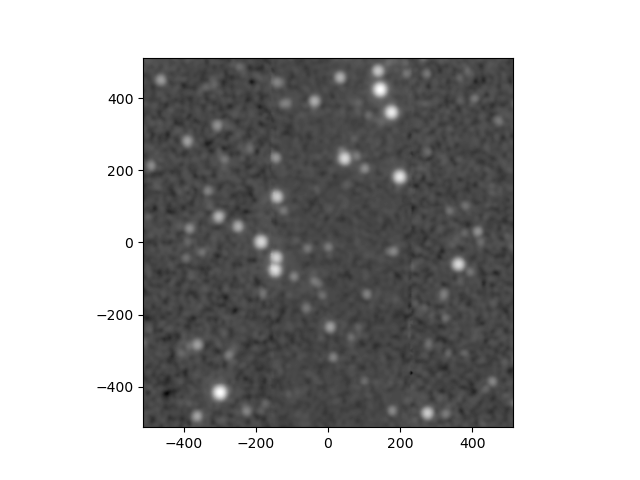

In [15]:
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import simple_norm
from astropy import wcs as astropy_wcs
from urllib.parse import urlencode
from astropy.io import fits
importlib.reload(sof)

coord = SkyCoord(str(np.round(RA_Center,13))+'  '+str(np.round(DEC_Center,13)),unit=(u.deg, u.deg), frame='icrs') 

print(RA_Center,DEC_Center)

IM_CCD_Scale1 = (3.095*60)/1056 #180/1024 or 180/1056 for full pixels? #~0.18
IM_CCD_Scale2 = IM_CCD_Scale1#(3.095*60)/1032 #180/1024 or 180/1032 for full pixels? #~0.18


w = sof.create_wcs(pixscale1=IM_CCD_Scale1,pixscale2=IM_CCD_Scale1, pos_angle=0., 
                     crval1=RA_Center, crval2=DEC_Center, crpix1=528.0, crpix2=516.0)

hips = '2MASS/J'#'CDS/P/DSS2/red'
#result = hips2fits.query_with_wcs(
#   hips=hips,
#   wcs=w,
#   get_query_payload=False,
#   format='fits',
#   min_cut=0.5,
#   max_cut=99.5,
#   cmap=Colormap('viridis'),
#)
query_params = { 
             'hips': '2MASS/J',
#             'wcs': w, 
             'ra': RA_Center, 
             'dec': DEC_Center,
             'fov': (3.095 * u.arcmin).to(u.deg).value, 
             'projection': 'TAN',
             'width': 1056, 
             'height': 1032 
             }                                                                                               
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
print(url)
hdul = fits.open(url)
hdul.info()
header = hdul[0].header
image = hdul[0].data

#hdul[0].data = np.fliplr(hdul[0].data)
#to save
filename  = "Strasbourg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".fits"
hdul.writeto(filename,overwrite=True)
print(filename)
#print(header)
print('scale of DSS image: ',header['CDELT2']*3600.,'\n')

print("to be compared with the default scale of SAMOS")
print('SAMOS scale: ',180/1024.)

%matplotlib notebook
hipsnorm = simple_norm(data=image, stretch='log')
im = plt.imshow(image, origin='lower',cmap='gray',norm=hipsnorm,extent=[-512, 512, -512, 512])
plt.show(im)

In [16]:
# Determine the RADEC offset from our center coords in degrees
RA_Offsets = np.round(finaltable['ra'] - RA_Center,20)
DEC_Offsets = np.round(finaltable['dec'] - DEC_Center,20)
print(np.c_[RA_Offsets, DEC_Offsets]) #in degrees

# Determine the RADEC offset in arcsec
RA_Offsets *= 3600
DEC_Offsets *= 3600
print(np.c_[RA_Offsets, DEC_Offsets])   #in arcsec

[[ 8.01479889e-03 -3.81661994e-03]
 [ 7.83716936e-03 -2.15583301e-03]
 [ 1.02005554e-02  5.98046484e-05]
 [ 7.75789826e-03  6.19796940e-03]
 [ 1.37042792e-02  2.16345218e-03]
 [ 1.66747195e-02  3.47506719e-03]
 [-2.63951987e-03  1.13939529e-02]
 [-1.10207140e-02  8.89852362e-03]
 [-1.99976064e-02 -3.02437818e-03]
 [-1.52699381e-02 -2.33364848e-02]
 [ 1.98648249e-03  1.92034608e-02]
 [-9.74916095e-03  1.76762061e-02]
 [-8.03174463e-03  2.07869317e-02]
 [-7.71525981e-03  2.33364848e-02]]
[[ 28.85327599 -13.73983178]
 [ 28.21380971  -7.76099884]
 [ 36.72199928   0.21529673]
 [ 27.92843372  22.31268983]
 [ 49.33540511   7.78842787]
 [ 60.02899018  12.51024187]
 [ -9.50227154  41.01823062]
 [-39.67457041  32.03468503]
 [-71.991383   -10.88776146]
 [-54.97177703 -84.01134526]
 [  7.15133697  69.13245879]
 [-35.09697941  63.63434206]
 [-28.91428068  74.83295428]
 [-27.77493533  84.01134526]]


In [17]:
#Determine the RADEC position in SAMOS CCD pixels using the scale factors, no WCS utils

print(IM_CCD_Scale1, "arcsec/pixel")
print((IM_CCD_Scale1 * u.arcsec).to(u.degree), "deg/pixel")
print((IM_CCD_Scale2 * u.arcsec).to(u.degree), "deg/pixel")


#
RA_Offsets_IMpix = -RA_Offsets / IM_CCD_Scale1 # in pixels, negative RA because our X-axis is flipped for some reaason
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale2

shifted_ra_offset_impix = RA_Offsets_IMpix+528
shifted_dec_offset_impix = DEC_Offsets_IMpix+516
print(np.c_[shifted_ra_offset_impix, shifted_dec_offset_impix])   #in pixels

regfname = "pixcoord_reg_from_scalef_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".reg"

importlib.reload(sof)
sof.write_region_file_from_coords(regfname, shifted_ra_offset_impix, shifted_dec_offset_impix, sys="image")

0.17585227272727275 arcsec/pixel
4.884785353535354e-05 deg deg/pixel
4.884785353535354e-05 deg deg/pixel
[[363.92321245 437.86719247]
 [367.55959583 471.86637173]
 [319.17699923 517.22430453]
 [369.18241242 642.88314736]
 [247.44971569 560.28960595]
 [186.63966812 587.14063231]
 [582.03553445 749.2539124 ]
 [753.613066   698.16816045]
 [937.38557053 454.08575069]
 [840.60202768  38.26181692]
 [487.33326959 909.12803704]
 [727.58217693 877.86249442]
 [692.42369629 941.54442498]
 [685.94470494 993.73818308]]


In [18]:
from astropy.wcs.utils import wcs_to_celestial_frame, proj_plane_pixel_scales, proj_plane_pixel_area

# Here are the sky-to-pixel coordinates calculated by astropy.wcs.utils
# You need a WCS for this, so use the one we created when we got the image from Strasbourg

stras_wcs = WCS(header)


impix_coords = np.array([skycoord_to_pixel(i,w,mode='all') for i in SkyCoord(finaltable["ra"], finaltable["dec"], unit=u.deg)])

impix_ra = impix_coords[:,0]
impix_dec = impix_coords[:,1]

#these coordinates are not shifted to be from center, 
#so shift them if you want to see them as offsets from center

shifted_impix_ra = impix_coords[:,0]-528.
shifted_impix_dec = impix_coords[:,1]-516


regfname = "pixcoord_reg_from_wcs_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".reg"

sof.write_region_file_from_coords(regfname, impix_ra, impix_dec, sys="image")

print(stras_wcs)
np.c_[shifted_impix_ra, shifted_impix_dec],np.c_[impix_ra, impix_dec]



WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 92.033524872092  24.353934677037  
CRPIX : 528.0  516.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -4.8847856834747e-05  4.8847856834748e-05  
NAXIS : 1056  1032


(array([[-1.50481004e+02, -7.91284969e+01],
        [-1.47166185e+02, -4.51295063e+01],
        [-1.91240902e+02,  2.31287907e-01],
        [-1.45678200e+02,  1.25887188e+02],
        [-2.56581292e+02,  4.33022114e+01],
        [-3.11976022e+02,  7.01592953e+01],
        [ 4.82227782e+01,  2.32254383e+02],
        [ 2.04522552e+02,  1.81176316e+02],
        [ 3.71965522e+02, -6.28874124e+01],
        [ 2.83837801e+02, -4.78722572e+02],
        [-3.80424011e+01,  3.92128317e+02],
        [ 1.80797067e+02,  3.60868888e+02],
        [ 1.48767937e+02,  4.24548776e+02],
        [ 1.42863547e+02,  4.76742207e+02]]),
 array([[377.51899575, 436.87150309],
        [380.83381506, 470.87049369],
        [336.75909816, 516.23128791],
        [382.32180015, 641.88718791],
        [271.41870757, 559.30221142],
        [216.02397814, 586.15929535],
        [576.22277821, 748.25438323],
        [732.5225524 , 697.17631562],
        [899.96552225, 453.11258755],
        [811.83780142,  37.27742848],
  

In [19]:
# want to see average differences between the WCS converted pixels and  the scale factor converted pixels
# pixel mappings should line up

diff_xpix = shifted_ra_offset_impix-impix_ra
diff_ypix = shifted_dec_offset_impix-impix_dec

avg_diff_xpix = np.ones_like(impix_ra)*np.mean(diff_xpix)
avg_diff_ypix = np.ones_like(impix_ra)*np.mean(diff_ypix)

xdiff_offset_from_avg = avg_diff_xpix-diff_xpix
ydiff_offset_from_avg = avg_diff_ypix-diff_ypix


# ra and dec offsets from center refer to offset, in arcseconds, from (RA_Center, DEC_Center)
dfcols = ["ra", "dec", "ra_offset_from_cent", "dec_offset_from_cent",
          "scaled_xpix", "scaled_ypix", "wcs_xpix", "wcs_ypix", "dx", "dy",
          "avg_dx", "avg_dy"]



dfdata = np.asarray([finaltable["ra"],finaltable["dec"],RA_Offsets, DEC_Offsets,
                     shifted_ra_offset_impix, shifted_dec_offset_impix, 
                     impix_ra, impix_dec,diff_xpix, diff_ypix, 
                     avg_diff_xpix, avg_diff_ypix])

pixels_df = pd.DataFrame(data=dfdata.T,columns=dfcols)

pixels_df["wcspx_plus_dxav"] = pixels_df.wcs_xpix+avg_diff_xpix
pixels_df["wcspy_plus_dyav"] = pixels_df.wcs_ypix+avg_diff_ypix

pixels_df["new_dx_noav"] = pixels_df.wcspx_plus_dxav-pixels_df.scaled_xpix
pixels_df["new_dy_noav"] = pixels_df.wcspy_plus_dyav-pixels_df.scaled_ypix

pixels_df

,ra,dec,ra_offset_from_cent,dec_offset_from_cent,scaled_xpix,scaled_ypix,wcs_xpix,wcs_ypix,dx,dy,avg_dx,avg_dy,wcspx_plus_dxav,wcspy_plus_dyav,new_dx_noav,new_dy_noav
0,92.041540,24.350118,28.853276,-13.739832,363.923212,437.867192,377.518996,436.871503,-13.595783,0.995689,2.074318,0.991654,379.593314,437.863157,15.670101,-0.004036
1,92.041362,24.351779,28.213810,-7.760999,367.559596,471.866372,380.833815,470.870494,-13.274219,0.995878,2.074318,0.991654,382.908133,471.862147,15.348537,-0.004224
2,92.043725,24.353994,36.721999,0.215297,319.176999,517.224305,336.759098,516.231288,-17.582099,0.993017,2.074318,0.991654,338.833416,517.222942,19.656417,-0.001363
3,92.041283,24.360133,27.928434,22.312690,369.182412,642.883147,382.321800,641.887188,-13.139388,0.995959,2.074318,0.991654,384.396118,642.878842,15.213706,-0.004306
4,92.047229,24.356098,49.335405,7.788428,247.449716,560.289606,271.418708,559.302211,-23.968992,0.987395,2.074318,0.991654,273.493026,560.293865,26.043310,0.004259
5,92.050200,24.357410,60.028990,12.510242,186.639668,587.140632,216.023978,586.159295,-29.384310,0.981337,2.074318,0.991654,218.098296,587.150949,31.458628,0.010317
6,92.030885,24.365329,-9.502272,41.018231,582.035534,749.253912,576.222778,748.254383,5.812756,0.999529,2.074318,0.991654,578.297096,749.246037,-3.738438,-0.007875
7,92.022504,24.362833,-39.674570,32.034685,753.613066,698.168160,732.522552,697.176316,21.090514,0.991845,2.074318,0.991654,734.596870,698.167969,-19.016196,-0.000191
8,92.013527,24.350910,-71.991383,-10.887761,937.385571,454.085751,899.965522,453.112588,37.420048,0.973163,2.074318,0.991654,902.039840,454.104241,-35.345730,0.018491
9,92.018255,24.330598,-54.971777,-84.011345,840.602028,38.261817,811.837801,37.277428,28.764226,0.984388,2.074318,0.991654,813.912119,38.269082,-26.689908,0.007265


<IPython.core.display.Javascript object>


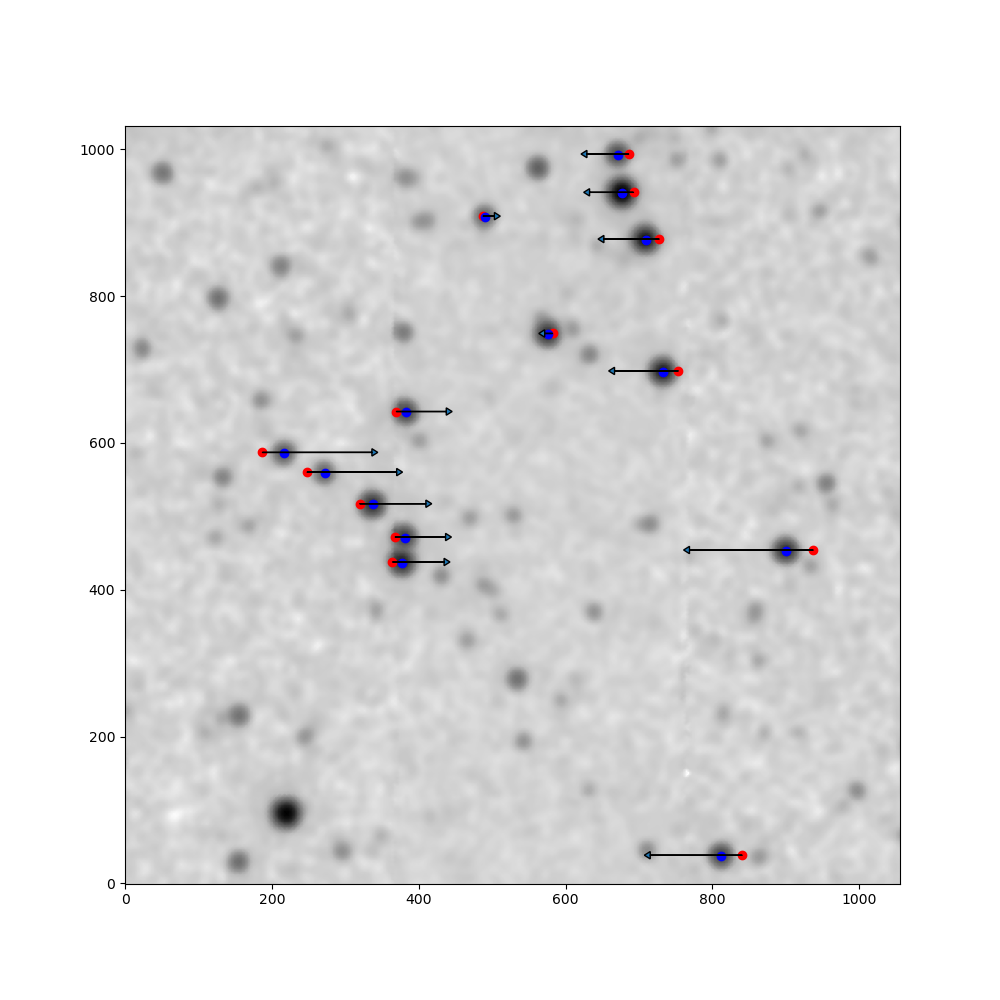

In [20]:

fig_arr = plt.figure(figsize=(10,10))
ax_arr = fig_arr.add_subplot(111)


norm = simple_norm(data=image,stretch='log')
im4 = ax_arr.imshow(image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')

ax_arr.plot(pixels_df.scaled_xpix, pixels_df.scaled_ypix, 'ro',zorder=0)

ax_arr.plot(pixels_df.wcs_xpix, pixels_df.wcs_ypix, 'bo',zorder=1)

for i in range(len(pixels_df)):
    ax_arr.arrow(pixels_df.loc[i,'scaled_xpix'],pixels_df.loc[i,'scaled_ypix'],
        dx=pixels_df.loc[i,'new_dx_noav']*5,dy=pixels_df.loc[i,'new_dy_noav']*5,
          head_width=10, length_includes_head=True, head_length=8)

# We want to create slit patterns on the DMD, positioned at the focal plane of the telescope
 
Based on the above plot, WCS-converted pixel coordinates line up best with stars in the field.

Pixel coordinates converted by the scale factor are offset from the WCS points, and the difference increases as you get farther from the center.  When planning for an observation like this, we should use astropy wcs utils to convert between sky coordinates and pixel coordinates.






<IPython.core.display.Javascript object>


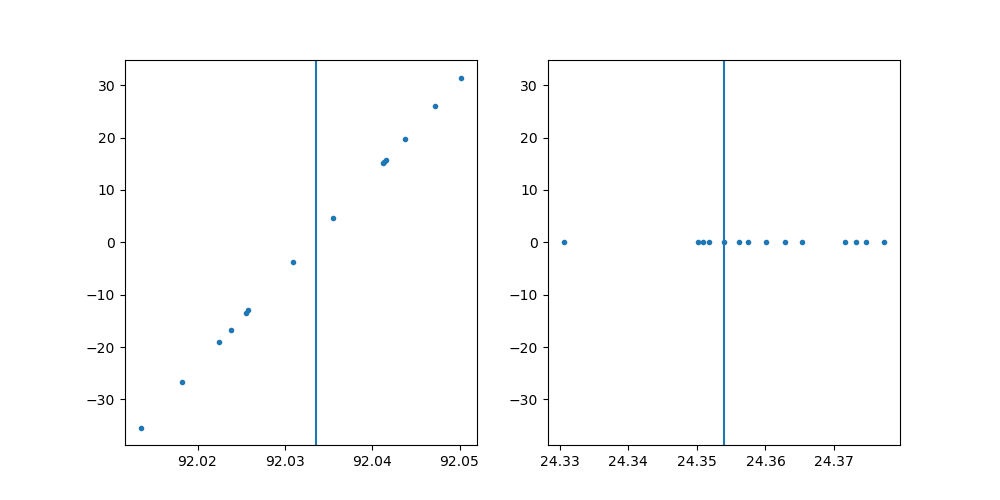

In [21]:
fig2 = plt.figure(figsize=(10,5))

ax2ra = fig2.add_subplot(121)
ax2dec = fig2.add_subplot(122,sharey=ax2ra)

ax2ra.scatter(pixels_df.ra,pixels_df.new_dx_noav,marker='.')
ax2ra.axvline(RA_Center)

ax2dec.scatter(pixels_df.dec,pixels_df.new_dy_noav,marker='.')
ax2dec.axvline(DEC_Center)



In [54]:
pixels_df

,ra,dec,ra_offset_from_cent,dec_offset_from_cent,scaled_xpix,scaled_ypix,wcs_xpix,wcs_ypix,dx,dy,avg_dx,avg_dy,wcspx_plus_dxav,wcspy_plus_dyav,new_dx_noav,new_dy_noav
0,92.041540,24.350118,28.853276,-13.739832,363.923212,437.867192,377.518996,436.871503,-13.595783,0.995689,2.074318,0.991654,379.593314,437.863157,15.670101,-0.004036
1,92.041362,24.351779,28.213810,-7.760999,367.559596,471.866372,380.833815,470.870494,-13.274219,0.995878,2.074318,0.991654,382.908133,471.862147,15.348537,-0.004224
2,92.043725,24.353994,36.721999,0.215297,319.176999,517.224305,336.759098,516.231288,-17.582099,0.993017,2.074318,0.991654,338.833416,517.222942,19.656417,-0.001363
3,92.041283,24.360133,27.928434,22.312690,369.182412,642.883147,382.321800,641.887188,-13.139388,0.995959,2.074318,0.991654,384.396118,642.878842,15.213706,-0.004306
4,92.047229,24.356098,49.335405,7.788428,247.449716,560.289606,271.418708,559.302211,-23.968992,0.987395,2.074318,0.991654,273.493026,560.293865,26.043310,0.004259
5,92.050200,24.357410,60.028990,12.510242,186.639668,587.140632,216.023978,586.159295,-29.384310,0.981337,2.074318,0.991654,218.098296,587.150949,31.458628,0.010317
6,92.030885,24.365329,-9.502272,41.018231,582.035534,749.253912,576.222778,748.254383,5.812756,0.999529,2.074318,0.991654,578.297096,749.246037,-3.738438,-0.007875
7,92.022504,24.362833,-39.674570,32.034685,753.613066,698.168160,732.522552,697.176316,21.090514,0.991845,2.074318,0.991654,734.596870,698.167969,-19.016196,-0.000191
8,92.013527,24.350910,-71.991383,-10.887761,937.385571,454.085751,899.965522,453.112588,37.420048,0.973163,2.074318,0.991654,902.039840,454.104241,-35.345730,0.018491
9,92.018255,24.330598,-54.971777,-84.011345,840.602028,38.261817,811.837801,37.277428,28.764226,0.984388,2.074318,0.991654,813.912119,38.269082,-26.689908,0.007265


In [64]:
importlib.reload(sof)

tablelist = finaltable.to_pandas(index=True).drop(columns='index')

good_inds, pixleft, pixright = sof.create_slit_pattern(tablelist, 185.7/1056)

pixleft, pixright

0     92.041369
1     92.041191
2     92.043554
3     92.041112
4     92.047058
5     92.050029
6     92.030714
7     92.022333
8     92.013356
9     92.018084
10    92.035340
11    92.023605
12    92.025322
13    92.025639
Name: ra, dtype: float64
1 0
skipping target 1
accepting target 2
3 2
skipping target 3
accepting target 4
5 4
accepting target 5
6 5
skipping target 6
skipping target 7
skipping target 8
skipping target 9
skipping target 10
skipping target 11
skipping target 12
accepting target 13


([205.08940687989931,
  249.8356200911058,
  321.56290363168625,
  382.3729512086423],
 [198.0894068797251, 242.83562009093157, 314.562903631512, 375.37295120846807])

In [62]:
slit_xsize = 7
pscale = (3.095*u.arcmin).to(u.arcsec).value/1056

half_slit_xsize_arcsec = slit_xsize/2. *pscale
print(pscale)
slit_edges_left = tablelist['ra'] - (half_slit_xsize_arcsec/3600)
print(slit_edges_left)
skycoord_to_pixel(SkyCoord(slit_edges_left[0],tablelist.loc[0,'dec'],unit=u.deg),stras_wcs)

0.17585227272727275
0     92.041369
1     92.041191
2     92.043554
3     92.041112
4     92.047058
5     92.050029
6     92.030714
7     92.022333
8     92.013356
9     92.018084
10    92.035340
11    92.023605
12    92.025322
13    92.025639
Name: ra, dtype: float64


(array(380.70765606), array(436.87132642))

In [27]:
# create a new WCS, but use the DMD scalings/rotations


                               

DMD_Scale = (3.095*60)/1080
crmirror1 = 540  # center x of 1080x1080 DMD array
# really the array is 2048x1080 but we'll restrict it to mirrors within the FoV)
crmirror2 = 540 # center y of 1080x1080 DMD array

dmd_wcs = sof.create_wcs(pixscale1=DMD_Scale,pixscale2=DMD_Scale, pos_angle=0., naxis1=1080, naxis2=1080,
                     crval1=RA_Center, crval2=DEC_Center, crpix1=crmirror1, crpix2=crmirror2)



dmd_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 92.0335248720921  24.35393467703682  
CRPIX : 540.0  540.0  
CD1_1 CD1_2  : -4.7762345679012e-05  0.0  
CD2_1 CD2_2  : -0.0  4.77623456790123e-05  
NAXIS : 1080  1080

http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=2MASS%2FJ&ra=92.0335248720921&dec=24.353934677036822&fov=0.051583333333333335&projection=TAN&width=1080&height=1080
Filename: /Users/danakoeppe/.astropy/cache/download/url/a99e0d9daffcac0c7ea23fcc3d17d75d/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1080, 1080)   float32   
Strasbourg_DMDscale_92.0335248720921_24.3539346770368.fits
scale of DSS image:  0.1719444560583132 

to be compared with the default scale of SAMOS
SAMOS scale:  0.17578125


<IPython.core.display.Javascript object>


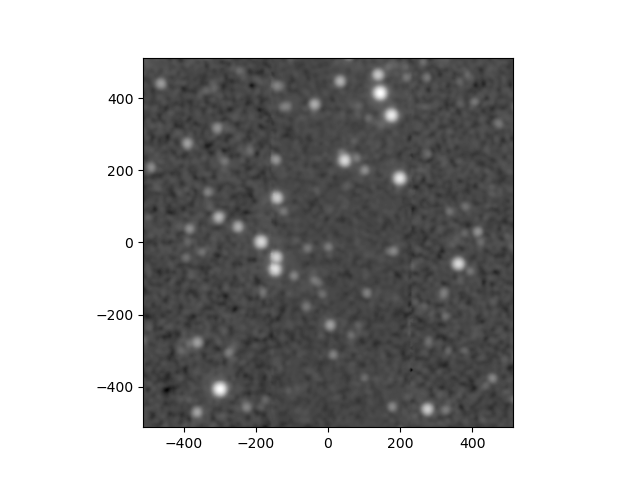

In [28]:
#get image with DMD params to see how we can get mirrors to match up with stars

hips = '2MASS/J'#'CDS/P/DSS2/red'
#result = hips2fits.query_with_wcs(
#   hips=hips,
#   wcs=w,
#   get_query_payload=False,
#   format='fits',
#   min_cut=0.5,
#   max_cut=99.5,
#   cmap=Colormap('viridis'),
#)
query_params = { 
             'hips': '2MASS/J',
#             'wcs': w, 
             'ra': RA_Center, 
             'dec': DEC_Center,
             'fov': (3.095 * u.arcmin).to(u.deg).value, 
             'projection': 'TAN',
             'width': 1080, 
             'height': 1080 
             }                                                                                               
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
print(url)
hdul = fits.open(url)
hdul.info()
header = hdul[0].header
image = hdul[0].data

#hdul[0].data = np.fliplr(hdul[0].data)
#to save
filename  = "Strasbourg_DMDscale_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".fits"
hdul.writeto(filename,overwrite=True)
print(filename)
#print(header)
print('scale of DSS image: ',header['CDELT2']*3600.,'\n')

print("to be compared with the default scale of SAMOS")
print('SAMOS scale: ',180/1024.)

%matplotlib notebook
hipsnorm = simple_norm(data=image, stretch='log')
im = plt.imshow(image, origin='lower',cmap='gray',norm=hipsnorm,extent=[-512, 512, -512, 512])
plt.show(im)

In [33]:
# get the mirror coordinates of our selected stars using the WCS we just created for the DMD


DMD_mirpix = np.array([skycoord_to_pixel(SkyCoord(finaltable[i]['ra'], 
                                                  finaltable[i]['dec'], unit=u.deg),dmd_wcs ) \
                       for i in range(len(finaltable))])

DMD_ra_mirpix = DMD_mirpix[:,0]
DMD_dec_mirpix = DMD_mirpix[:,1]

shifted_DMD_ra_mirpix = DMD_ra_mirpix-540
shifted_DMD_dec_mirpix = DMD_dec_mirpix-540

np.c_[DMD_ra_mirpix,DMD_dec_mirpix]

array([[ 386.1217002 ,  459.09585544],
       [ 389.51185632,  493.86755037],
       [ 344.4354413 ,  540.25927172],
       [ 391.03365924,  668.77098764],
       [ 277.61004183,  584.30907986],
       [ 220.95634128,  611.77655206],
       [ 589.34147772,  777.55561921],
       [ 749.1935195 ,  725.31668643],
       [ 920.44201139,  475.70605545],
       [ 830.31138781,   50.4200973 ],
       [ 501.11572618,  941.06305123],
       [ 724.92881846,  909.09318126],
       [ 692.17175397,  974.22033899],
       [ 686.13317271, 1027.59998481]])

<IPython.core.display.Javascript object>


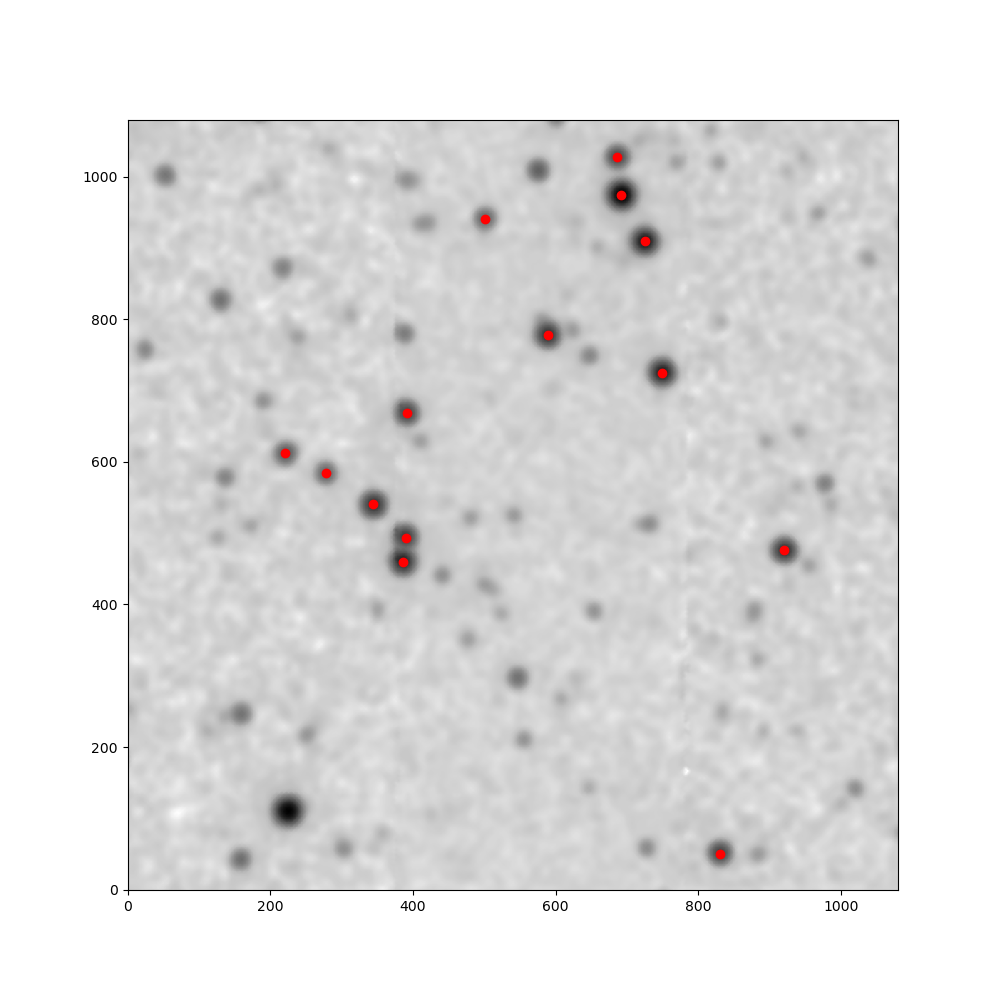

In [34]:

fig_dmd = plt.figure(figsize=(10,10))
ax_dmd = fig_dmd.add_subplot(111)


norm = simple_norm(data=image,stretch='log')
imdmd = ax_dmd.imshow(image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')

ax_dmd.plot(DMD_ra_mirpix, DMD_dec_mirpix, 'ro',zorder=0)



# Now we have established accurate DMD mirror coordinates


Let's try to find the transformation that goes between SI pixels and DMD mirrors.

This part should be easy because we don't have to be at SOAR to see how SI pixels map to DMD mirrors.

In [35]:
affine = transform.estimate_transform('affine', impix_coords, DMD_mirpix)

transform.matrix_transform(impix_coords,affine.params)

array([[ 386.1217002 ,  459.09585544],
       [ 389.51185632,  493.86755037],
       [ 344.4354413 ,  540.25927172],
       [ 391.03365924,  668.77098764],
       [ 277.61004183,  584.30907986],
       [ 220.95634128,  611.77655206],
       [ 589.34147772,  777.55561921],
       [ 749.1935195 ,  725.31668643],
       [ 920.44201139,  475.70605545],
       [ 830.31138781,   50.4200973 ],
       [ 501.11572618,  941.06305123],
       [ 724.92881846,  909.09318126],
       [ 692.17175397,  974.22033899],
       [ 686.13317271, 1027.59998481]])

In [36]:
finaltable['rank']=finaltable['phot_bp_mean_mag']-10*finaltable['bp_rp']
finaltable['index','rank','bp_rp']

index,rank,bp_rp
int64,float32,float32
0,1.83498,1.3132372
1,1.0483274,1.4798965
2,7.4482956,0.670969
3,4.540781,1.0731106
4,7.280364,0.85235405
5,3.8845406,1.221055
6,-0.7998104,1.6590843
7,8.878079,0.46063137
8,11.10913,0.23056889


# Create table that contains general information for slits sizes for stars

Might be easier to have a UI that asks the observer for slit sizes.





In [188]:
finaltable

index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,rank
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83,float32
0,0.005928496705287895,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27.455555,1322.3517,0.545841741804998,40.34758443540829,31.0,0.0,2.9424577,1.507783782986589,0.019369240224611124,-0.07953287,19.0,10.0,0.14190188,0.0,19.0,0.0,163.0,33453.0734892548,38.995317015506686,857.87415,14.377275,18.0,14243.43154718133,52.984968305127936,268.82022,14.967352,18.0,27740.996400149343,80.94930546260235,342.69592,13.654115,1.2550246,1.0,1.3132372,0.59007645,0.72316074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.4952772688494,2.0531132090600095,91.86011942171517,0.924018510701893,100002,4881.1553,4572.62,5027.0,--,--,--,--,--,--,200111,1.32678,1.2509109,1.5118681,0.9002912,0.7741304,1.0264521,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275839304609920,1.83498
1,0.006400577609515265,1.6357214584097997e+18,Gaia DR2 3426275839304608896,3.426275839304609e+18,387502386.0,2015.5,92.04136204145622,0.0333947396718245,24.3517788440269,0.03028632017331826,0.29720298093090375,0.03561285953209015,8.345384,-0.5200194318052099,0.06304805708884074,-7.93582332931274,0.05312213910671792,-0.27806515,0.16915683,-0.23754132,0.38358825,-0.2704573,0.28157383,-0.40164572,0.248266,0.20742162,-0.2265235,1

In [186]:
from astropy.wcs.utils import pixel_to_skycoord


pscale = np.abs(stras_wcs.pixel_scale_matrix[0,0])

ra_slit_left = finaltable['ra'][0]-(1.5*(pscale))
print(pixels_df.wcs_xpix[0], pixels_df.wcs_xpix[0]-1.5)
pixel_edge1 = skycoord_to_pixel(SkyCoord(ra_slit_left,finaltable['dec'][0],unit='deg'),stras_wcs)
slit_ra_centers = finaltable['ra']

half_slit_xsize=3.5
slit_edges_left = slit_ra_centers - (half_slit_xsize / 3600.) #put into degrees bc that is unit of RA list
slit_edges_right = slit_ra_centers + (half_slit_xsize / 3600.) 

#center of mass of the targets system
centerfield = (min(slit_edges_left)+max(slit_edges_left)) / 2.

#range in pixels of the targets
range_pixels = (max(slit_edges_left)-min(slit_edges_left))/pscale

range_pixels, ra_slit_left, (finaltable['ra'][0]-ra_slit_left)

377.51899574704805 376.01899574704805


(750.7458517086333, 92.04146639919384, 1.5000000000444522)

In [38]:
importlib.reload(sof)
DMDPattern1 = sof.DMDPattern(Pattern_ID=1, RA_Center=RA_Center, DEC_Center=DEC_Center, 
                             Sky_to_DMD_Transform=affine)

DMDPattern1.add_slit(finaltable[0]['ra'], finaltable[0]['dec'], 
                     x=DMD_ra_mirpix[0], y=DMD_dec_mirpix[0], slit_n=1)

In [41]:
affine.params, DMD_Scale

(array([[ 1.02272727e+00,  2.55663887e-16,  2.27272727e-02],
        [-9.61572873e-17,  1.02272727e+00,  1.22954545e+01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 0.17194444444444446)

In [76]:
DMDPattern1.Slit_List[0].ra

92.04153967097909

<IPython.core.display.Javascript object>


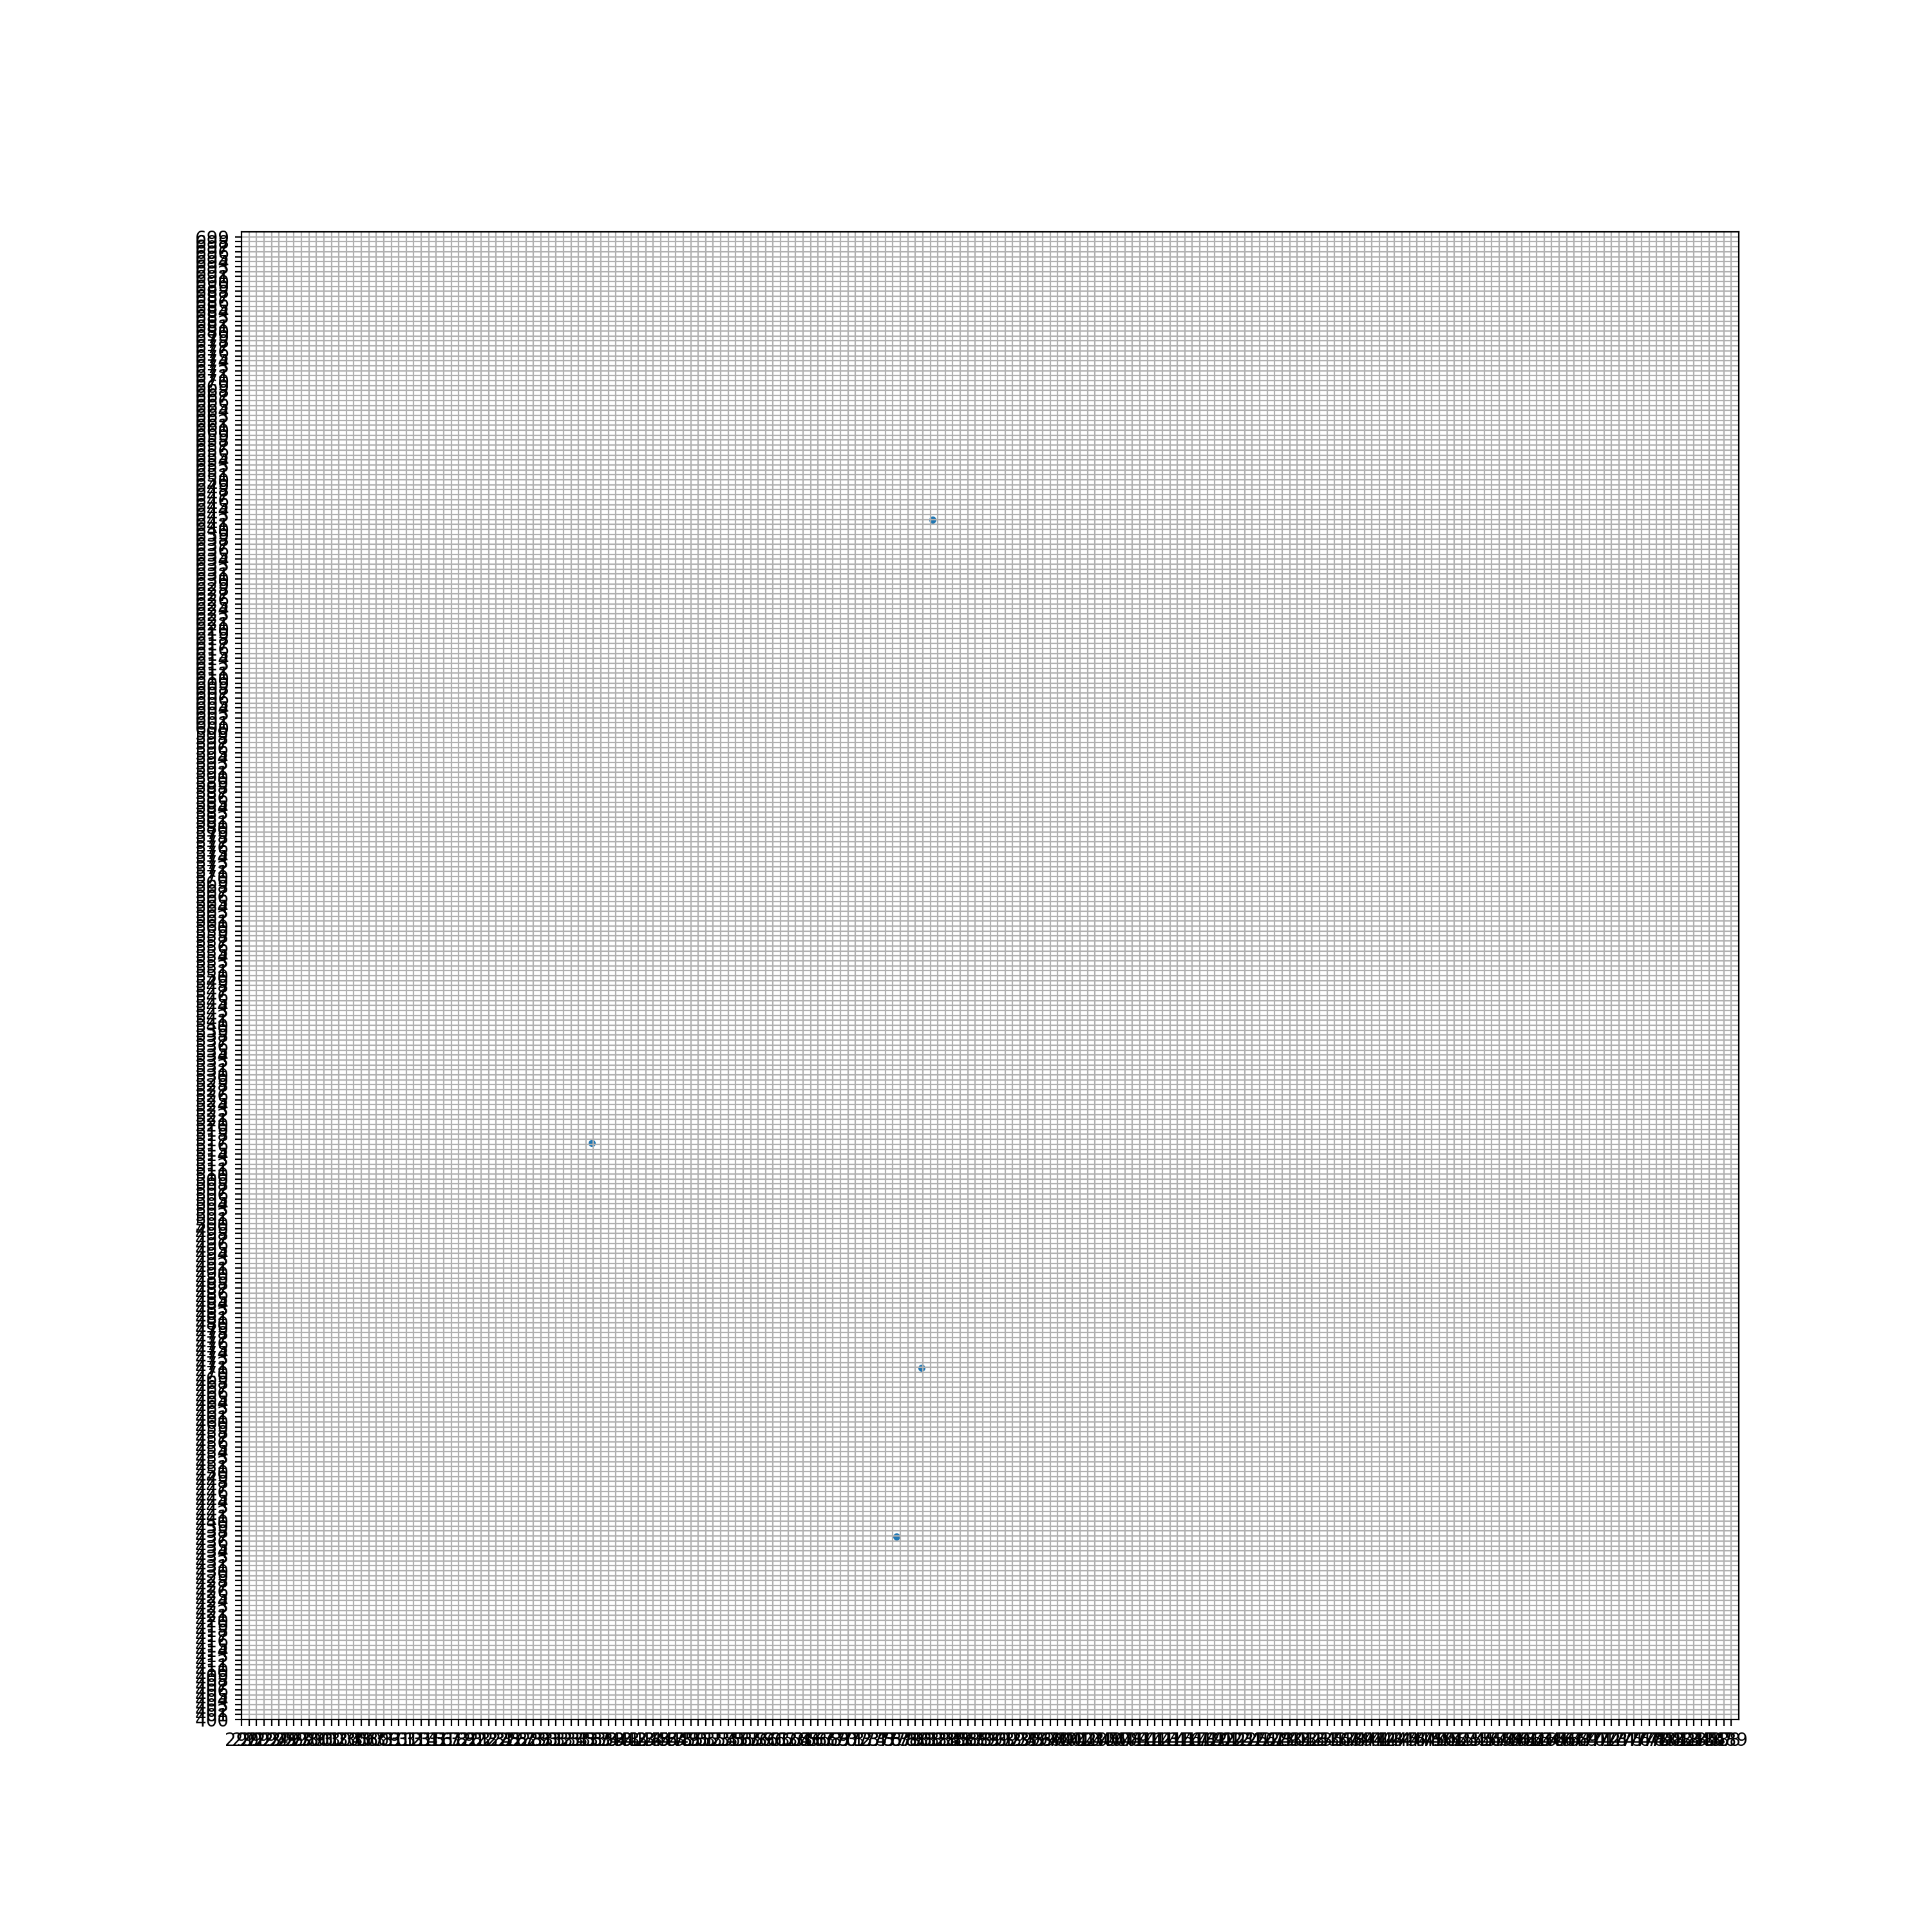

In [41]:
fig_grid = plt.figure(figsize=(15,15))
ax_grid = fig_grid.add_subplot(111)


ax_grid.grid(visible=True, axis='both')

ax_grid.set_xticks(np.arange(290,490,1))
ax_grid.set_yticks(np.arange(400,700,1))

#ax_grid.tick_params(labelbottom=False,labelleft=False)
ax_grid.set_xlim(290,490)
ax_grid.set_ylim(400,700)

ax_grid.scatter(impix_ra, impix_dec, marker='.')